<a href="https://colab.research.google.com/github/Anna-Biju-Abraham/git_test/blob/main/Car_Price_Prediction_using_different_ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
car_data =pd.read_csv('car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data['Year'].astype(float).dtypes

dtype('float64')

In [ ]:
car_data['Kms_Driven'].astype(float).dtypes

dtype('float64')

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
car_data['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [ ]:
car_data['Fuel_Type'].unique()

array([0, 1, 2])

In [ ]:
car_data['Present_Price'].astype(int).dtypes

dtype('int64')

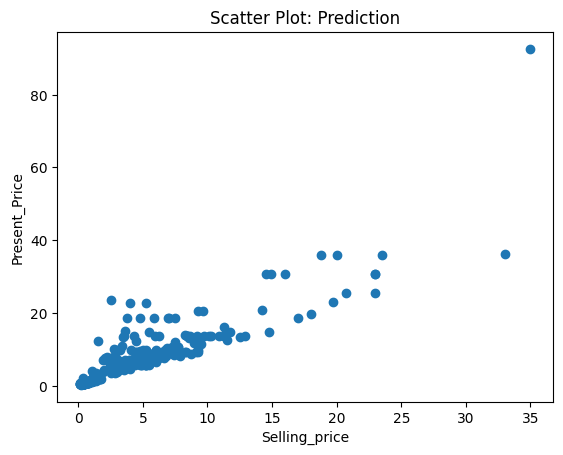

In [ ]:
plt.scatter(car_data['Selling_Price'],car_data['Present_Price'])
plt.xlabel('Selling_price')
plt.ylabel('Present_Price')
plt.title('Scatter Plot: Prediction')
plt.show()

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
X =car_data[['Year','Selling_Price','Kms_Driven','Fuel_Type']]
y=car_data['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
print("Shape of y_test:", y_test.shape)

print("Shape of pred:", pred.shape)

Shape of y_test: (61,)
Shape of pred: (61,)


In [ ]:
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.806571991307122
Mean Absolute Error (MAE): 2.0120233608012827
R-squared (R2) Score: 0.8055666159844703


In [ ]:
model.score(X_train,y_train)

0.8491457868764858

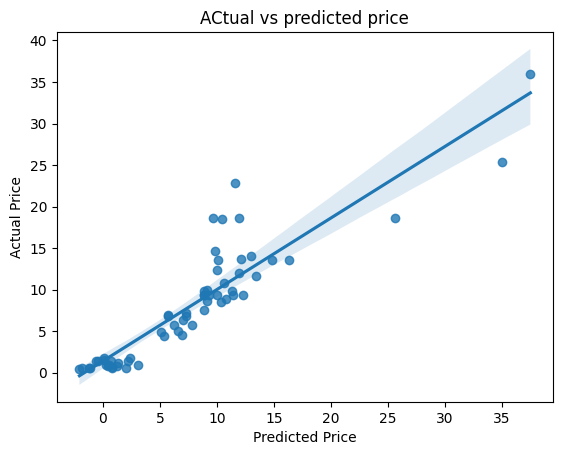

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X =car_data[['Year','Selling_Price','Kms_Driven','Fuel_Type']]
y=car_data['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
predicted_price = model.predict(X_test)

print("Predicted Price:", predicted_price)

Predicted Price: [ 0.826 14.79   9.4    0.51  18.61  10.79   1.9    0.826  0.54   9.4
 12.5    1.47   9.94   0.51   9.54   4.43   1.2   19.77   0.51   1.6
  0.64   8.89   6.79   4.6    0.81   6.8    9.4    4.43   1.78   1.78
  1.2   16.09   0.95   3.95  10.79   6.8   18.61   7.98   6.79  12.48
 15.04   4.15   6.8    0.72   9.4    0.81   7.71  18.61   6.8    5.98
  9.4    2.37  35.96  25.39  13.09  13.6    8.4   13.09   4.43   9.94
  0.51 ]


In [ ]:
print("Shape of y_test:", y_test.shape)

print("Shape of pred:", pred.shape)

Shape of y_test: (61,)
Shape of pred: (61,)


In [ ]:
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.806571991307122
Mean Absolute Error (MAE): 2.0120233608012827
R-squared (R2) Score: 0.8055666159844703


In [ ]:
model.score(X_train,y_train)

0.9999865862953412

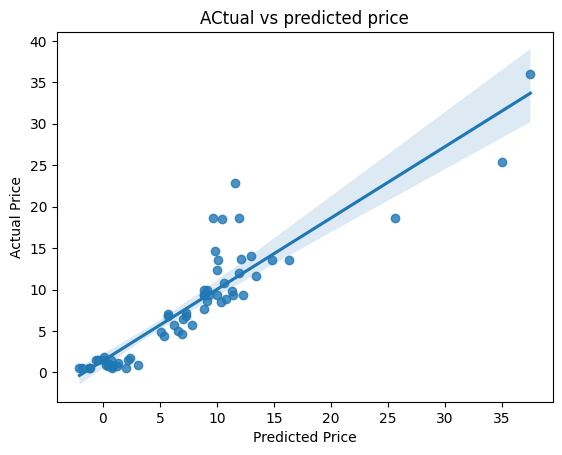

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X =car_data[['Year','Selling_Price','Kms_Driven','Fuel_Type']]
y=car_data['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
predicted_price = model.predict(X_test)

print("Predicted Price:", predicted_price)

Predicted Price: [ 0.826 14.79   9.4    0.51  18.61  10.79   1.9    0.826  0.54   9.4
 12.5    1.47   9.94   0.51   9.54   4.43   1.2   19.77   0.51   1.6
  0.64   8.89   6.79   4.6    0.81   6.8    9.4    4.43   1.78   1.78
  1.2   16.09   0.95   3.95  10.79   6.8   18.61   7.98   6.79  12.48
 15.04   4.15   6.8    0.72   9.4    0.81   7.71  18.61   6.8    5.98
  9.4    2.37  35.96  25.39  13.09  13.6    8.4   13.09   4.43   9.94
  0.51 ]


In [ ]:
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.806571991307122
Mean Absolute Error (MAE): 2.0120233608012827
R-squared (R2) Score: 0.8055666159844703


In [ ]:
model.score(X_train,y_train)

0.9999865862953412

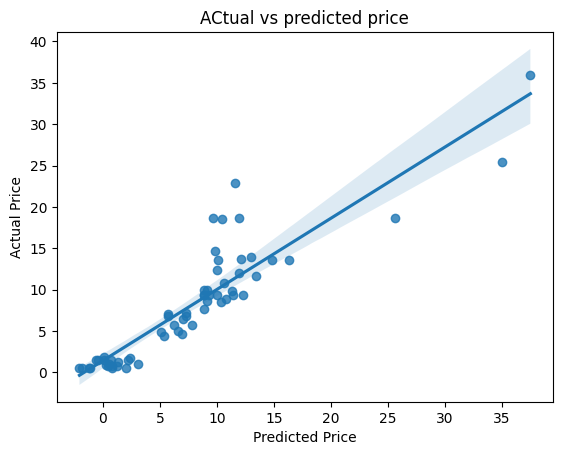

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
X =car_data[['Year','Selling_Price','Kms_Driven','Fuel_Type']]
y=car_data['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test, pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.806571991307122
Mean Absolute Error (MAE): 2.0120233608012827
R-squared (R2) Score: 0.8055666159844703


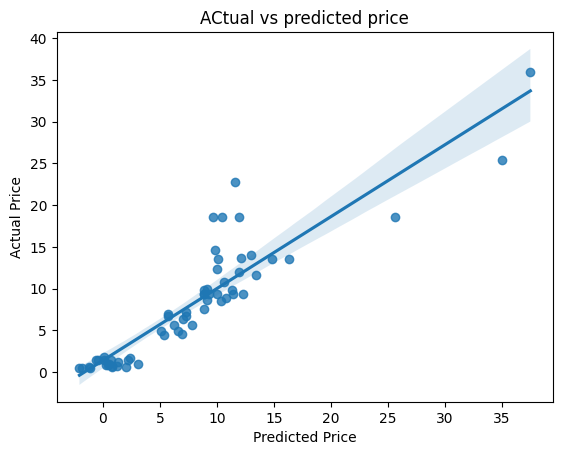

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()